When we fit for the Zernike polynomails, the recovered coefficients and the input coefficients will not be exactly the same. How does the residual in the coefficients impact the surface error?

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pylab as plt

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from utils.utils import makeGrid, zernikeResidualSurfaceError

In [3]:
# Grid parameters, in meters.
xmin = -50.
xmax = 50.
ymin = 0.1
ymax = 100.
dx   = 0.8
dy   = 0.8
# Surface error.
eps = 230e-6 # m
# Observing frequency.
nu = 115e9
lmbd = 3e8/nu
# Thermal deformations.
n_zern = 36
zindxs = [4,5,6,7,8,9,10,11,12,13,14,15]
zcoefs = np.arange(0., 1000., 5.)*1e-6 #[225, 594, 1080]

In [23]:
# Measured values.
z4 = np.array([74*0.17, 177*0.76, 510*0.07])
z7 = np.array([68*0.3, 158*0.76, 527*0.06])
z13 = np.array([55*0.65, 165*0.04, 520*0.04])

In [5]:
eps_tot = np.zeros((len(zindxs), len(zcoefs)), dtype=np.float)
eta_tot = np.zeros((len(zindxs), len(zcoefs)), dtype=np.float)

In [6]:
# Make grid.
xx, yy, zz = makeGrid(xmin, xmax, dx, ymin, ymax, dy)

In [7]:
%%time
for i,iz in enumerate(zindxs):
    for j,zv in enumerate(zcoefs):
        z_coef = np.zeros(n_zern)
        z_coef[iz] = zv
        eps_tot[i,j], eta_tot[i,j], _ = zernikeResidualSurfaceError(xx, yy, z_coef, eps=eps, lmbd=lmbd, verbose=False)

CPU times: user 3min 2s, sys: 58.2 ms, total: 3min 2s
Wall time: 3min 2s


<IPython.core.display.Javascript object>


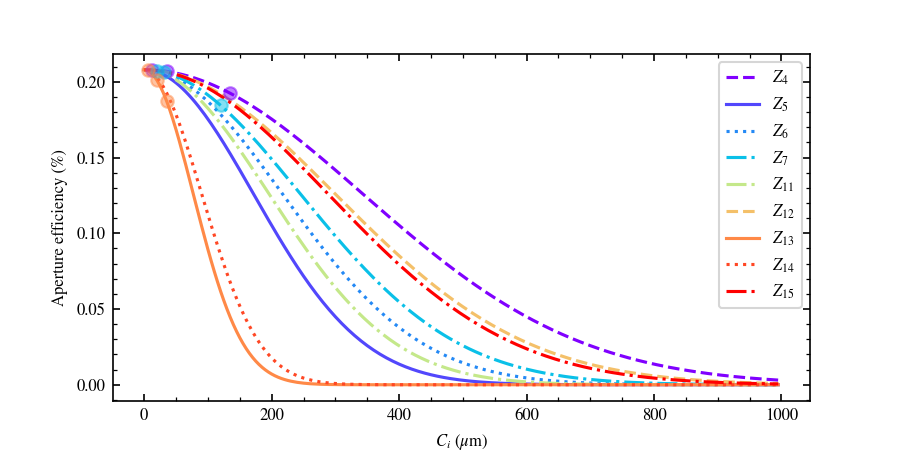

In [24]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rc('font', **{'family':'STIXGeneral', 'weight':'normal'})
matplotlib.rc('text', usetex=False)
matplotlib.rcParams.update({'font.size': 8})

fig = plt.figure(dpi=150, frameon=False, figsize=(6,3))

ax = fig.add_subplot(111)

n = len(zindxs)
colors = plt.cm.rainbow(np.linspace(0,1,n))
ls = ['--', '-', ':', '-.']

for i,iz in enumerate(zindxs):
    if iz == 10 or iz == 9 or iz == 8:
        continue
    #print(i, iz)
    ax.plot(zcoefs*1e6, eta_tot[i,:], label='$Z_{{{}}}$'.format(iz), c=colors[i], ls=ls[i%4])
ax.legend(loc=0, fancybox=True)

idx = [np.argmin(abs(z - zcoefs*1e6)) for z in z4]
ax.plot(z4, eta_tot[4-4,idx], marker='o', c=colors[4-4], ls='', alpha=0.5)

idx = [np.argmin(abs(z - zcoefs*1e6)) for z in z7]
ax.plot(z7, eta_tot[7-4,idx], marker='o', c=colors[7-4], ls='', alpha=0.5)

idx = [np.argmin(abs(z - zcoefs*1e6)) for z in z13]
ax.plot(z13, eta_tot[13-4,idx], marker='o', c=colors[13-4], ls='', alpha=0.5)

ax.minorticks_on()
ax.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

ax.set_ylabel("Aperture efficiency (%)")
ax.set_xlabel("$C_{i}$ ($\mu$m)")

plt.savefig('eta_a_zernike.pdf',
            bbox_inches='tight',
            pad_inches=0.06)

In [25]:
idx = [np.argmin(abs(z - zcoefs*1e6)) for z in z4]
print(eta_tot[4-4,idx])
print((np.nanmax(eta_tot) - eta_tot[4-4,idx])/(np.nanmax(eta_tot))*100.)
idx = [np.argmin(abs(z - zcoefs*1e6)) for z in z7]
print(eta_tot[7-4,idx])
print((np.nanmax(eta_tot) - eta_tot[7-4,idx])/(np.nanmax(eta_tot))*100.)
idx = [np.argmin(abs(z - zcoefs*1e6)) for z in z13]
print(eta_tot[13-4,idx])
print((np.nanmax(eta_tot) - eta_tot[13-4,idx])/(np.nanmax(eta_tot))*100.)

[0.20784379 0.19250697 0.20696056]
[0.09577213 7.46771727 0.52031755]
[0.20734969 0.18448467 0.20648625]
[ 0.33327292 11.32379737  0.74830257]
[0.1875779  0.20760385 0.20112618]
[9.83697439 0.21110494 3.32472391]


In [14]:
np.nanmax(eta_tot)

0.20804304085861067